# Analiza podatkov grobov v Sloveniji


S strani [findagrave.com](http://findagrave.com/), sem pridobil 80 najbolj [popisanih slovenskih pokopališč](https://www.findagrave.com/cemetery/search?locationId=country_87&page=1&orderby=memorials). Na žalost na samih nagrobnih spomenikih ni veliko podatkov, skoraj vsi pa vključujejo:

- ime
- letnico rojstva
- letnico smrti

Razmeroma velik delež grobov sicer vključuje tudi točna datuma rojstva in smrti, vendar se mi je zdelo omejevanje samo na te spomenike nepotrebno, saj verjetno ne bi pridobil veliko, izgubil pa bi dobršen del podatkov.

Kljub temu pa sem za določene dele analize omejil na podmonožice spomenikov, saj nekateri spomeniki ne vključujejo imena, ali pa imajo katero od letnic neznano (oziroma nerazpoznavno).

Poleg teh treh podatkov, sem dodal še kraj pokopališča in poskusil uganiti spol osebe. Več o tem spodaj.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

osebe = pd.read_csv('data/cleaned/data.csv')
osebe

,name,surname,gender,born,died,place
0,Alojz,Ambrožič,M,1905.0,1934.0,Bušinja Vas
1,Ana,Ambrožič,F,1902.0,1978.0,Bušinja Vas
2,Jože,Avguštin,M,1905.0,1977.0,Bušinja Vas
3,Terezija,Avguštin,F,1903.0,1971.0,Bušinja Vas
4,Alojzija,Bela,F,1932.0,2007.0,Bušinja Vas
5,Jože,Bela,M,1930.0,1998.0,Bušinja Vas
6,Karel,Bela,M,1895.0,1966.0,Bušinja Vas
7,Katarina,Bela,F,1898.0,1974.0,Bušinja Vas
8,Dako,Bračika,NaN,NaN,NaN,Bušinja Vas
9,Zdenka,Damjanovič,F,1960.0,1996.0,Bušinja Vas


## Pregled podatkov

Preden začnem z analizo podatkov, se mi izredno pomembno, da najprej ugotovim kakšni podatki sploh so, ter tako morda že takoj na začetku opazim kakšno njihovo posebnost, ki jo bo potrebno v nadaljni analiz upoštevati.

Najprej je verjetno smiselno pogledati, s katerih pokopališč imamo podatke, ter kako so ta pokopališča razporejena po Sloveniji.

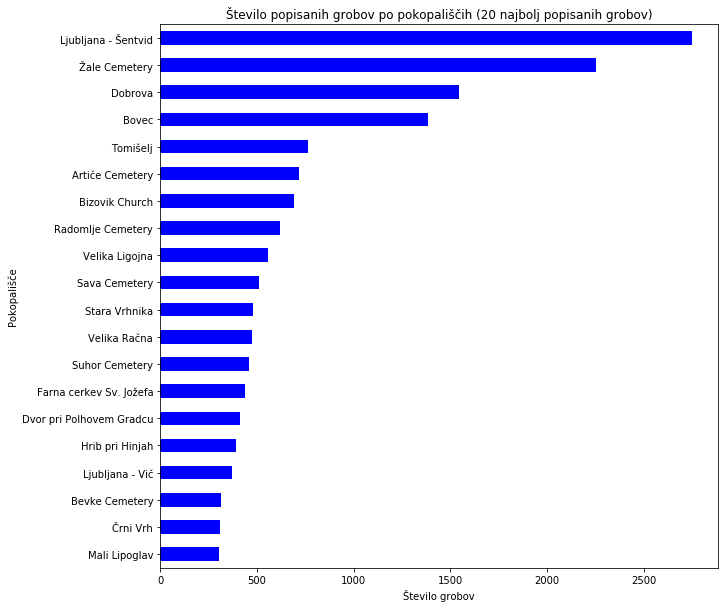

In [2]:
osebe_po_krajih = osebe.groupby(['place']).size().sort_values()


ax = osebe_po_krajih[-20:].plot(
    kind='barh',
    figsize=(10, 10),
    title='Število popisanih grobov po pokopališčih (20 najbolj popisanih grobov)',
    color='blue'
)

ax.set_xlabel('Število grobov')
ax.set_ylabel('Pokopališče');

In [3]:
print(f'Največ podatkov na pokopališču {osebe_po_krajih.idxmax()} ({osebe_po_krajih.max()})')
print(f'Največ podatkov na pokopališču {osebe_po_krajih.idxmin()} ({osebe_po_krajih.min()})')

Največ podatkov na pokopališču Ljubljana - Šentvid (2746)
Največ podatkov na pokopališču Škocjan, Grosuplje (84)


Očitno ni podatkov celotnih pokopališč, saj bi sicer npr. pokopališče `Ljubljana - Žale` moralo vsebovati precej več podatkov o grobovih. Ker sem izbral samo 80 najbolj popisanih pokopališč, imajo vsa pokopališča vsaj nekaj (več kot 80) grobov. Večina grobov je iz Ljubljane (prvi dve pokopališči), vendar se mi zdi da so tudi ostali kraji ne tako slabo zastopani, imamo kraje iz cele Slovenije.

#### O določanju spola

Na grobovih spola osebe ne piše. Kljub temu se mi je zdelo da bi bilo zanimivo gledati razlike med spoloma. Zato sem osebam poskusil določiti še spol.

Določil sem ga s pomočjo seznama 200 najpogostejših slovenskih imen, ki je dostopen na [tej povezavi](https://www.stat.si/ImenaRojstva/sl/FirstNames/ExpandNames). Zavedam se dejstva, da to ni idealen način določanja spola, vendar menim, da neupoštevanje manj pogostih imen ne bi smelo bistveno spremeniti nadaljne obdelave podatkov. Seveda bom v analizo, kjer spol ne bo pomemben vključil tudi ostale osebe.

In [4]:
print(f'Skupaj oseb: {len(osebe)}')

osebe_z_imenom = osebe[[not i for i in osebe.isnull()['name']]]
print(f'Skupaj oseb z določenim imenom: {len(osebe_z_imenom)}')

osebe_s_spolom = osebe_z_imenom[[not i for i in osebe_z_imenom.isnull()['gender']]]
print(f'Skupaj oseb z določenim spolom: {len(osebe_s_spolom)}')

Skupaj oseb: 25237
Skupaj oseb z določenim imenom: 24927
Skupaj oseb z določenim spolom: 20904


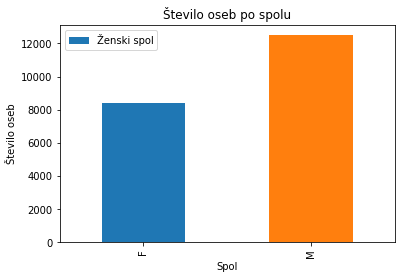

In [5]:
ax = osebe_s_spolom.groupby('gender').size().plot(kind='bar', title='Število oseb po spolu')
ax.set_xlabel('Spol')
ax.set_ylabel('Število oseb')
ax.legend(['Ženski spol', 'Moški spol']);

Vidimo, da sicer izgubumo kar precej oseb, vendar izguba ni tako kritična. Kar pa je precej nenavadno je razmerje spolov. Pričakoval sem, da bo razmerje v prid moškemu spolu, vendar ne tako izrazito. Iz tega lahko sklepamo nekaj od naštetega

- Ženske imajo več različnih imen, z 200 najpogostejšimi imeni ne zajamemo dovolj populacije
- Morda je res toliko več moških grobov (ženske naj bi živele dlje kot moški)

Sam pa menim, da je razlog v spomenikih vojakom po 2. svetovni vojni, ki so bili postavljeni na skoraj vsakem pokopališču v Sloveniji (bodisi spomeniki padlim v vojni ali izginulim po vojni). Opazili smo že, da popisi ne vključujejo celotnih pokopališč, vendar sem skoraj prepričan, da je popisovalec pogosto začel pri takem spomeniku, ter ni popisal vsega. Na takšnih spomenikih pa so bila zapisana skoraj izključno imena moških. 


#### Razporeditev grobov po času

Kar pa je najbolj nujno preveriti, je koliko grobov iz katerega obdobja imamo.

In [6]:
def narisi_histogram(osebe, naslov, po1800=False):
    '''Narisi histogram in oznaci letnice na histogramu in doda legendo.'''
    if po1800:
        osebe = osebe[osebe['born'] > 1800]
    
    ax = osebe['born'].hist(bins=100, figsize=(15, 4), color='green')
    osebe['died'].hist(bins=100, ax=ax, color='red')
    
    ax.set_title(naslov)
    ax.legend(['leto rojstva', 'leto smrti'])
    ax.set_xlabel('Leto')
    ax.set_ylabel('Število oseb')
    
    if po1800:
        ax.set_xlim(1800, 2020)
    plt.show()
    

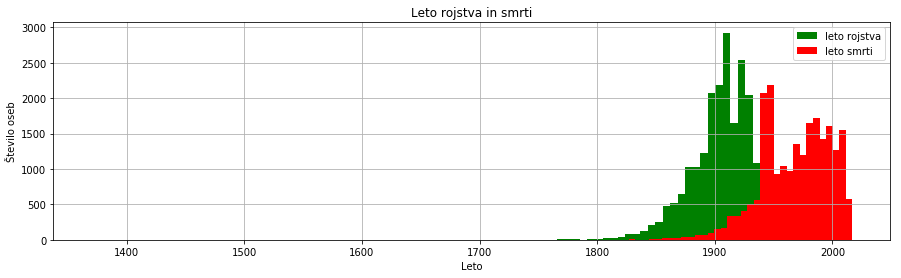

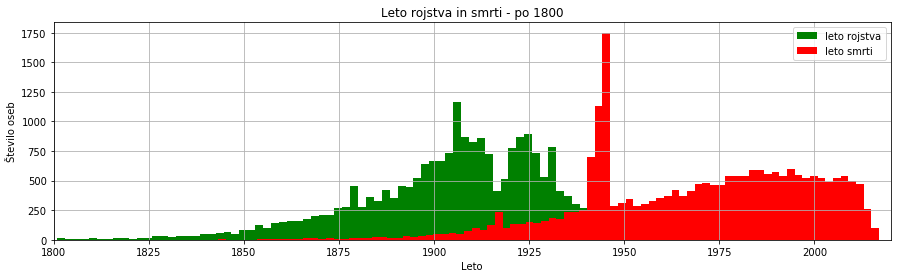

In [7]:
# Histogram vseh rojstnih letnic
narisi_histogram(osebe, 'Leto rojstva in smrti')

# Omejimo se samo na del, kjer je velika večina grobov
narisi_histogram(osebe, 'Leto rojstva in smrti - po 1800', po1800=True)

Opazimo, da imamo podatke za grobove oseb, ki si se večinoma rodile po letu 1800. Zelo majhen delež se jih je rodil pred tem. Iz oblike histograma sklepamo da je podatkov za novejše grobove več, opazimo pa tudi nenavaden vrh nekaj let pred 1950. Skoraj gotovo to ni naključje, temveč posledica grozot 2. svetovne vojne.

## 2. svetovna vojna

Iz zadnjega je zelo očitno, da je malo pred letom 1950 nenadno umrlo veliko ljudi. Smiselno bi bilo pogledati še razmerje med spoloma v tem času

In [8]:
zenske, moski = osebe_s_spolom.groupby('gender')

zenske, moski = zenske[1], moski[1]

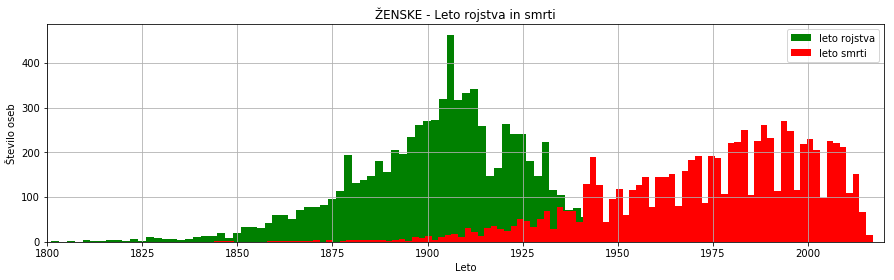

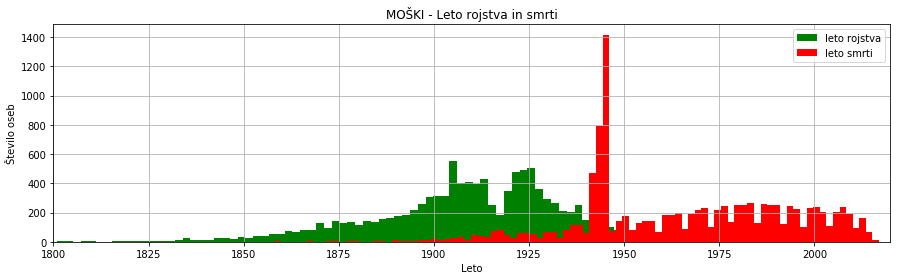

In [9]:
narisi_histogram(zenske, 'ŽENSKE - Leto rojstva in smrti', po1800=True)
narisi_histogram(moski, 'MOŠKI - Leto rojstva in smrti', po1800=True)

Vidimo da pri ženskemu spolu v teh letih sploh ni nobenega posebnega ekstrema, medtem ko je sedaj za moški spol ekstrem še lepše viden.

Glede leta rojstva težko sklepamo kaj posebnega, lahko pa rečemo, da je za razliko od leta smrti to izgleda neodvisno od spola.

## Povprečna življenjska doba

Najprej poglejmo povprečno doseženo starost.

povprečna starost 61.1 +/- 24.4 let


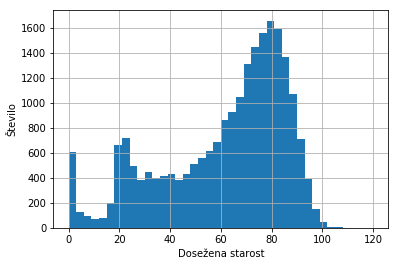

In [10]:
osebe['age'] = osebe['died']- osebe['born']
# v resnici to ni zares starost, saj je ta lahko za +-1 leto drugacna, odvisno od dneva rojstva/smrti v letu.

def izracunaj_in_narisi_starost(osebe):
    if 'age' not in osebe.columns:
        osebe['age'] = osebe['died']- osebe['born']
    
    ax = osebe['age'].hist(bins=40)
    ax.set_xlabel('Dosežena starost')
    ax.set_ylabel('Število')
    print(f'povprečna starost {osebe["age"].mean() :.1f} +/- {osebe["age"].std() :.1f} let')
    
    return ax

izracunaj_in_narisi_starost(osebe);

Prva stvar ki jo opazimo, je razmeroma velika smrtnost pri starosti 0 let. To lahko pripišemo dejstvu, da je včasih veliko otrok umrlo pri porodu oziroma v prvih nekaj mesecih.

Naslednja stvar, ki nas zmoti, pa je velika smrtnost pri starosti okoli 20 let. Spet si poglejmo razporeditev po spolu:

Moški: povprečna starost 56.0 +/- 24.0 let
Ženske: povprečna starost 69.9 +/- 21.3 let


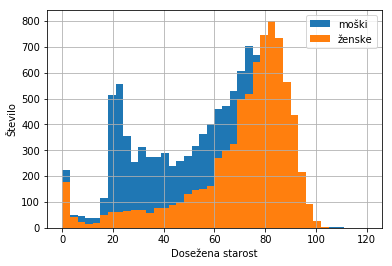

In [11]:
print('Moški:', end=' ')
ax = izracunaj_in_narisi_starost(moski)
print('Ženske:', end=' ')
izracunaj_in_narisi_starost(zenske)
ax.legend(['moški', 'ženske']);

Ponovno je ta nenavaden pojav smrtnosti prisoten samo pri moških. Tu spet lahko vidimo grozote, ki jih je povzročila vojna. Posledično je tudi povprečna dosežena starost pri moških izrazito manjša kot pri ženskah. 


Kljub temu, da imamo podatke le za razmeroma kratko obdobje (večina rojstev je v zadnjih 200 letih), se mi še vedno zdi smiselno pogledati življenjsko dobo v odvisnosti od leta rojstva. 

In [12]:
def narisi_starost_po_letih(osebe, naslov):
    # smiselno gledati sele po letu 1800, prej imamo samo posamezne osebe
    starost_po_letih = osebe[osebe['born'] > 1801].groupby(['born'])['age']
    ax = starost_po_letih.mean().plot(figsize=(20, 5), grid=True)
    ax.set_xlabel('Leto rojstva')
    ax.set_ylabel('Povrečna starost')
    ax.set_xticks(np.arange(1800, 2020, 10))
    return ax

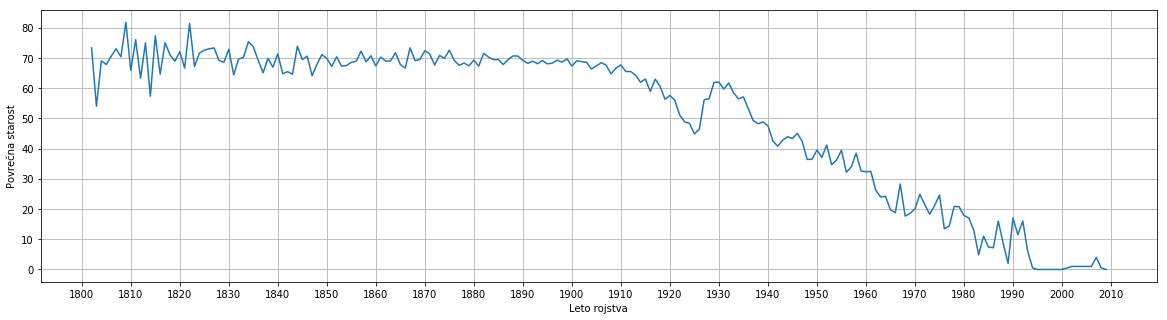

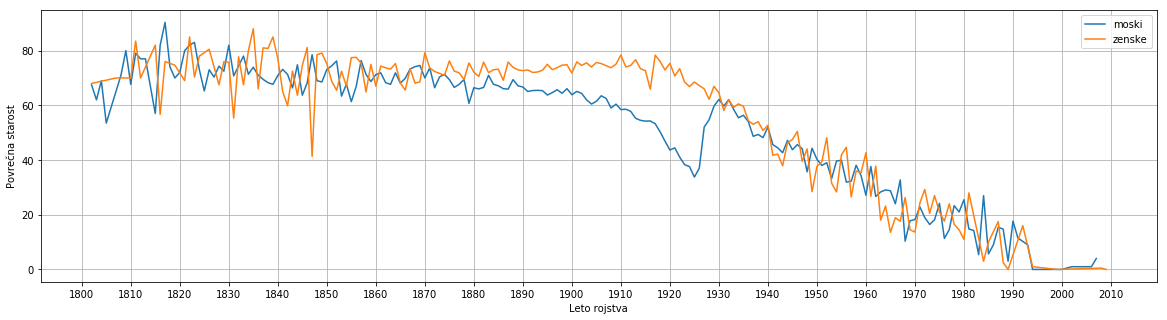

In [13]:
narisi_starost_po_letih(osebe, 'Povprečna starost oseb glede na leto rojstva');
plt.show()
ax = narisi_starost_po_letih(moski, '')
narisi_starost_po_letih(zenske, 'Povprečna starost oseb glede na leto rojstva')
ax.legend(['moski', 'zenske']);

Opazimo, da je bila življenjska doba do približno leta 1900 razmeroma konstantna, potem pa je padla, spet pa je bil razlog 2. svetovna vojna. Življenjska doba potem okoli leta 1930 spet naraste, saj otroci niso šli v vojno.

Potem se življenska doba naprej postopoma niža, a razlog je povsem drug - veliko ljudi, rojenih po letu 1930 je še vedno živih.

## Življenjska doba po krajih

Poglejmo še, če se življenjska doba razlikuje po krajih. Pričakujem, da bodo razlike majhne.

In [14]:
osebe['age'] = osebe['died'] - osebe['born']

starost_po_krajih = osebe.groupby('place')['age'].mean().sort_values(ascending=False)

print(f'Najvišja povprečna starost je v kraju {starost_po_krajih.idxmax()} ({starost_po_krajih.max():.1f} let)')
print(f'Najnižja povprečna starost je v kraju {starost_po_krajih.idxmin()} ({starost_po_krajih.min():.1f} let)')

Najvišja povprečna starost je v kraju Ljubljana - Štepanja Vas (70.1 let)
Najnižja povprečna starost je v kraju Sveti Vid Cemetery (30.6 let)


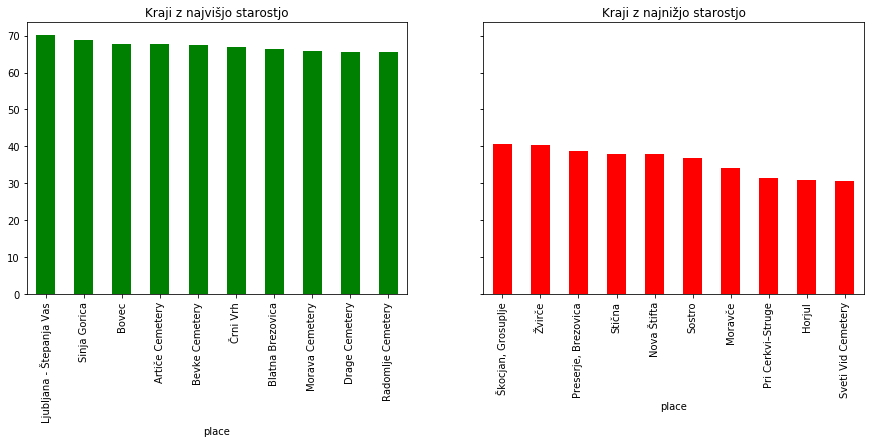

In [15]:
_, axes = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))

starost_po_krajih[:10].plot(ax=axes[0], kind='bar', color='green', title='Kraji z najvišjo starostjo')
starost_po_krajih[-10:].plot(ax=axes[1], kind='bar', color='red', title='Kraji z najnižjo starostjo');

Rezultat me je presenetil, zato sem še pogledat na [stran s katere sem zajel podatke](https://www.findagrave.com/cemetery/2669181/memorial-search?page=6#sr-191671916) za kraj z najnižjo povprečno starostjo. Ko sem gledal slike grobov, sem opazil, da so skoraj vsi popisani grobovi iz spomenika, ki je nastal po 2. svetovni vojni. Verjetno je podobno pri ostalih pokopališčih s tako nizko povprečno starostjo.